<a href="https://www.kaggle.com/code/aleksandrmorozov123/transformers?scriptVersionId=233751452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-object-detection/data/sample_submission.csv
/kaggle/input/car-object-detection/data/train_solution_bounding_boxes (1).csv
/kaggle/input/car-object-detection/data/testing_images/vid_5_26420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31520.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31720.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_26560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_27840.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28360.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_25240.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29020.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_30720.jpg
/kaggle/

**Self-attention mechanizm is a foundational block of all transformer architectures**

In [2]:
import torch
from torch.nn.functional import softmax

In [3]:
# we start with 3 inputs, each with dimension 4
x = [
    [1, 0, 2, 0],
    [0, 3, 0, 3],
    [2, 2, 2, 2]
]

x = torch.tensor (x, dtype = torch.float32)
x

tensor([[1., 0., 2., 0.],
        [0., 3., 0., 3.],
        [2., 2., 2., 2.]])

In [4]:
# initialise weights
w_key = [
    [0, 1, 1],
    [2, 1, 0],
    [1, 0, 1],
    [3, 3, 1]
]
w_query = [
    [1, 0, 1],
    [2, 0, 3],
    [0, 2, 3],
    [0, 2, 2]
]
w_value = [
    [0, 2, 1],
    [0, 2, 0],
    [1, 3, 0],
    [2, 2, 0]
]

w_key = torch.tensor (w_key, dtype = torch.float32)
w_query = torch.tensor (w_query, dtype = torch.float32)
w_value = torch.tensor (w_value, dtype = torch.float32)

print ("Weights for key: \n", w_key)
print ("Weights for query: \n", w_query)
print ("Weights for value: \n", w_value)

Weights for key: 
 tensor([[0., 1., 1.],
        [2., 1., 0.],
        [1., 0., 1.],
        [3., 3., 1.]])
Weights for query: 
 tensor([[1., 0., 1.],
        [2., 0., 3.],
        [0., 2., 3.],
        [0., 2., 2.]])
Weights for value: 
 tensor([[0., 2., 1.],
        [0., 2., 0.],
        [1., 3., 0.],
        [2., 2., 0.]])


In [5]:
# adding the bias vector to the product of matrix multiplication
keys = x @ w_key
querys = x @ w_query
values = x @ w_value

print ("Keys: \n", keys)
print ("Querys: \n", querys)
print ("Values: \n", values)

Keys: 
 tensor([[ 2.,  1.,  3.],
        [15., 12.,  3.],
        [12., 10.,  6.]])
Querys: 
 tensor([[ 1.,  4.,  7.],
        [ 6.,  6., 15.],
        [ 6.,  8., 18.]])
Values: 
 tensor([[ 2.,  8.,  1.],
        [ 6., 12.,  0.],
        [ 6., 18.,  2.]])


In [6]:
# calculating attention scores
attn_scores = querys @ keys.T
print (attn_scores)

tensor([[ 27.,  84.,  94.],
        [ 63., 207., 222.],
        [ 74., 240., 260.]])


In [7]:
# calculate softmax
attn_scores_softmax = softmax (attn_scores, dim = -1)

print (attn_scores_softmax)

tensor([[7.9845e-30, 4.5398e-05, 9.9995e-01],
        [0.0000e+00, 3.0590e-07, 1.0000e+00],
        [0.0000e+00, 2.0612e-09, 1.0000e+00]])


In [8]:
attn_scores_softmax = [
    [0.0, 0.5, 0.5],
    [0.0, 1.0, 0.0],
    [0.0, 0.9, 0.1]
]
attn_scores_softmax = torch.tensor (attn_scores_softmax)

print (attn_scores_softmax)

tensor([[0.0000, 0.5000, 0.5000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.9000, 0.1000]])


In [9]:
# multiply scores with values
weighted_values = values[:, None] * attn_scores_softmax.T[:,:, None]
print (weighted_values)

tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 3.0000,  6.0000,  0.0000],
         [ 6.0000, 12.0000,  0.0000],
         [ 5.4000, 10.8000,  0.0000]],

        [[ 3.0000,  9.0000,  1.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.6000,  1.8000,  0.2000]]])


In [10]:
# multiply scores with values of input 2 and input 3
outputs = weighted_values.sum (dim = 0)
print (outputs)

tensor([[ 6.0000, 15.0000,  1.0000],
        [ 6.0000, 12.0000,  0.0000],
        [ 6.0000, 12.6000,  0.2000]])


**Inference with DPT transformer**

In [11]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.4/481.4 kB 13.4 MB/s eta 0:00:00


In [12]:
from transformers import DPTFeatureExtractor, DPTForDepthEstimation

feature_extractor = DPTFeatureExtractor.from_pretrained ("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained ("Intel/dpt-large")

preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/dpt/feature_extraction_dpt.py:30: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


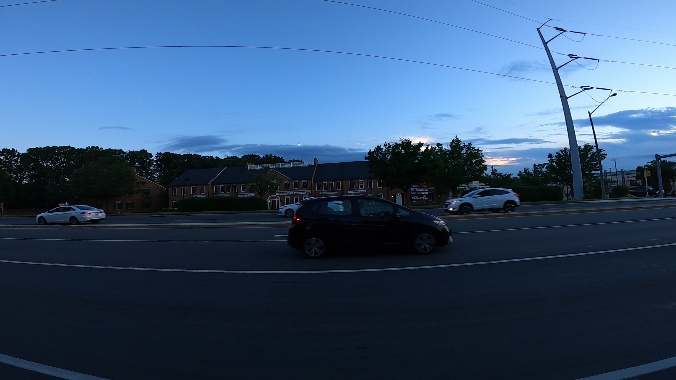

In [13]:
from PIL import Image
import requests

image_0 = Image.open ('/kaggle/input/car-object-detection/data/training_images/vid_4_29900.jpg')
image_0

In [14]:
# forward pass
import torch

pixel_values = feature_extractor (image_0, return_tensors="pt").pixel_values

with torch.no_grad ():
    outputs = model (pixel_values)
    predicted_depth = outputs.predicted_depth

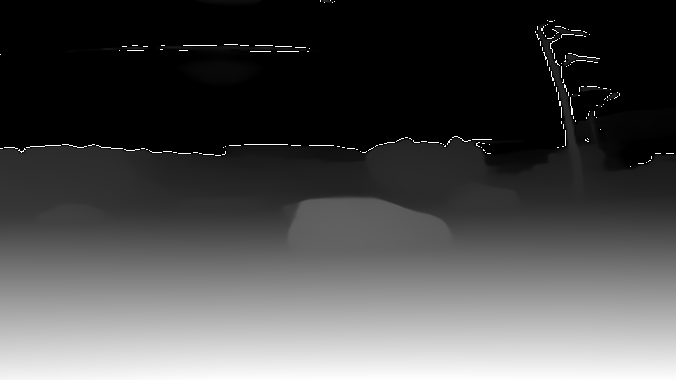

In [15]:
# visualization of depth
import numpy as np

# interpolate to the original size
prediction = torch.nn.functional.interpolate (
    predicted_depth.unsqueeze (1),
    size = image_0.size[::-1],
    mode = "bicubic",
    align_corners = False,
).squeeze()
output = prediction.cpu().numpy()
formatted = (output * 255 / np.max(output)).astype ('uint8')
depth = Image.fromarray (formatted)
depth

**Zero show image segmentation with CLIPSeg**

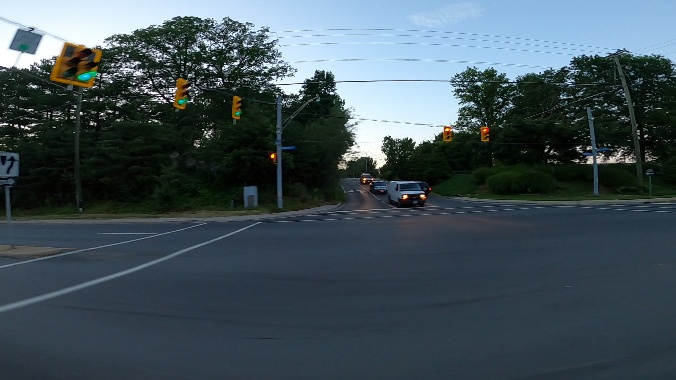

In [16]:
image_1 = Image.open ('/kaggle/input/car-object-detection/data/testing_images/vid_5_30820.jpg')
image_1

In [17]:
# load the model
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

# load the processor
processor = CLIPSegProcessor.from_pretrained ("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained ("CIDAS/clipseg-rd64-refined")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/603M [00:00<?, ?B/s]

In [18]:
# prepare images and text for model
prompts = ["road", "crossroads", "van", "traffic lights"]
inputs = processor (text = prompts, images = [image_1] * len(prompts), padding="max_length", return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/transformers/image_processing_utils.py:44: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


[Text(0, -15, 'road'),
 Text(0, -15, 'crossroads'),
 Text(0, -15, 'van'),
 Text(0, -15, 'traffic lights')]

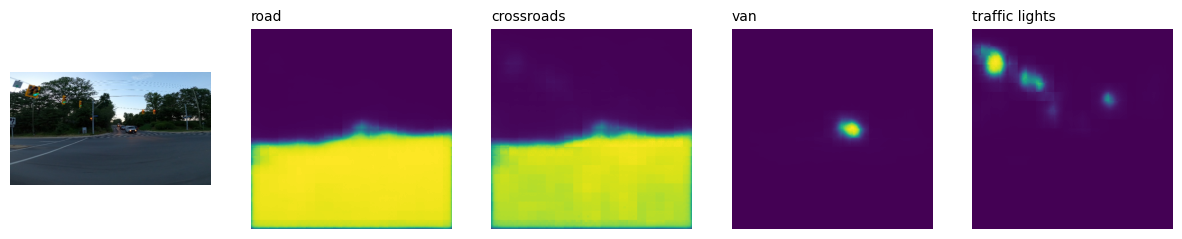

In [19]:
# forward pass
import matplotlib.pyplot as plt

# predict
with torch.no_grad():
    outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots (1, 5, figsize = (15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image_1)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)]
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)]

In [20]:
# convert to a binary mask
filename = f"mask.png"

# also we save the second mask
plt.imsave(filename, torch.sigmoid(preds[1][0]))

In [21]:
import cv2
img_1 = cv2.imread(filename)

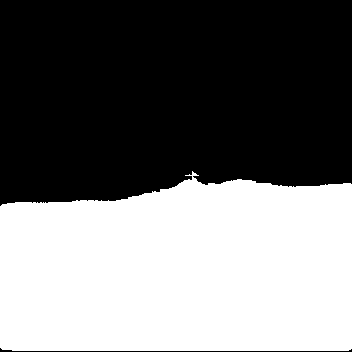

In [22]:
gray_image = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
(thresh, bw_image) = cv2.threshold (gray_image, 100, 255, cv2.THRESH_BINARY)

# fix color format
cv2.cvtColor (bw_image, cv2.COLOR_BGR2RGB)

Image.fromarray (bw_image)

**Self-attention of DINO**

In [23]:
!pip install -q transformers

In [24]:
import skimage.io
from skimage.measure import find_contours
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def apply_mask (image, mask, color, alpha=0.5):
    for c in range (3):
        image[:, :, c] = image[:, :, c] * (1 - alpha * mask) + alpha * mask * color[c] * 255
    return image

def random_colors (N, bright=True):
    """
    Generate random colors
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i/N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

def display_instances (image, mask, fname = "test", figsize=(5, 5), blur = False, contour = True, alpha = 0.5):
    fig = plt.figure (figsize = figsize, frameon = False)
    ax = plt.Axes (fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax = plt.gca()

    N = 1
    mask = mask[None, :, :]
    # Generate random colors
    colors = random_colors(N)

    # Show area outside image boundaries
    height, width = image.shape[:2]
    margin = 0
    ax.set_ylim(height + margin, -margin)
    ax.set_xlim (-margin, width + margin)
    ax.axis('off')
    masked_image = image.astype(np.uint32).copy()
    for i in range(N):
        color = colors[i]
        _mask = mask[i]
        if blur:
            _mask = cv2.blur(_mask, (10, 10))
        # Mask
        masked_image = apply_mask (masked_image, _mask, color, alpha)
        # mask polygon
        # pad to ensure proper polygons
        if contour:
            padded_mask = np.zeros((_mask.shape[0] + 2, _mask.shape[1] + 2))
            padded_mask [1:1, 1:-1] = _mask
            contours = find_contours(padded_mask, 0.5)
            for verts in contours:
                # subtract the padding and flip (y, x) to (x, y)
                verts = np.flipllr(verts) - 1
                p = Polygon (verts, facecolor = "none", edgecolor = color)
                ax.add_patch(p)
    ax.imshow (masked_image.astype(np.uint8), aspect = 'auto')
    fig.savefig(fname)
    print (f"{fname} saved.")
    return

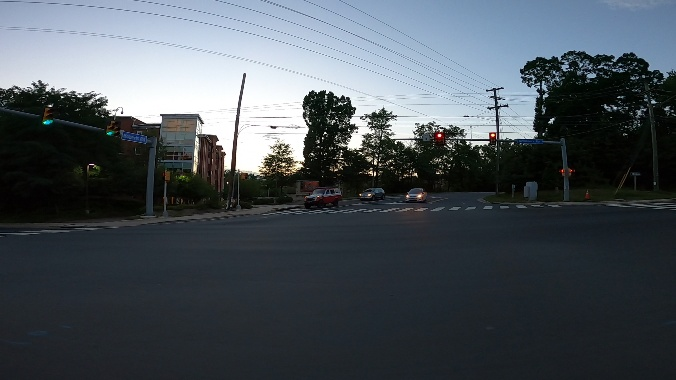

In [25]:
# get image 
image_2 = Image.open ("/kaggle/input/car-object-detection/data/testing_images/vid_5_27400.jpg")
image_2

In [26]:
# prepare the image
from transformers import ViTImageProcessor

feature_extractor = ViTImageProcessor.from_pretrained ("facebook/dino-vits8", size = 480)

preprocessor_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

In [27]:
pixel_values = feature_extractor (images = image_2, return_tensors = "pt").pixel_values
print (pixel_values.shape)

torch.Size([1, 3, 480, 480])


In [28]:
# forward pass
from transformers import ViTModel

model = ViTModel.from_pretrained ("facebook/dino-vits8", add_pooling_layer=False)

outputs = model (pixel_values, output_attentions = True, interpolate_pos_encoding = True)

config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/86.7M [00:00<?, ?B/s]

`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [29]:
# visualization
attentions = outputs.attentions[-1]
nh = attentions.shape[1]

# we keep only the output of patch attention
attentions = attentions [0, :, 0, 1:].reshape(nh, -1)
print (attentions.shape)

torch.Size([6, 3600])


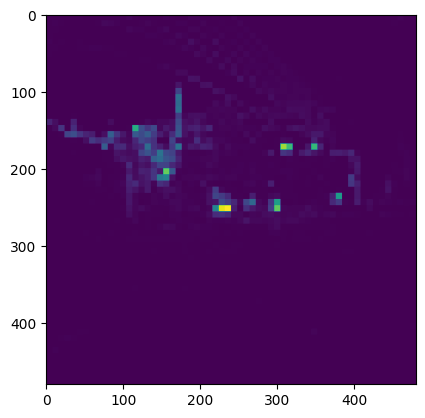

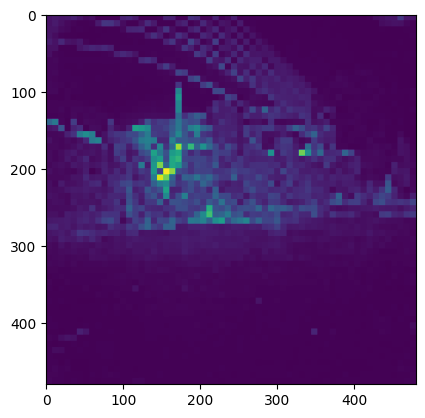

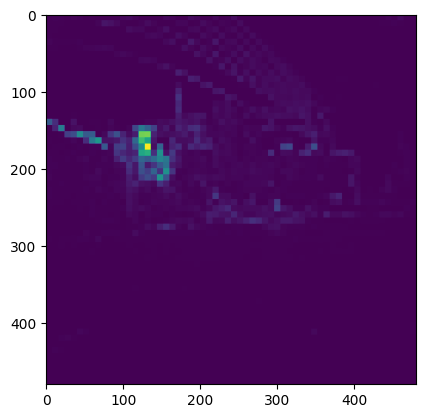

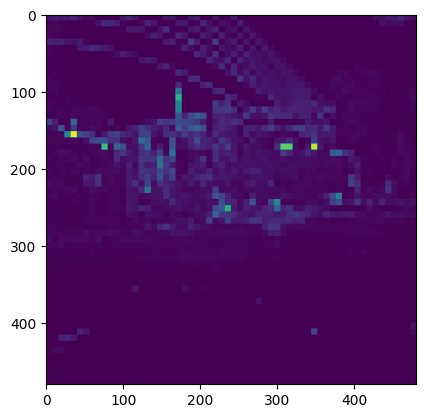

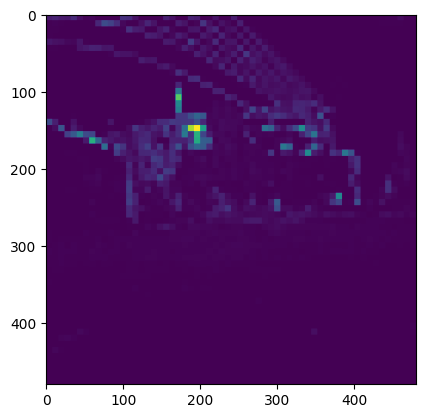

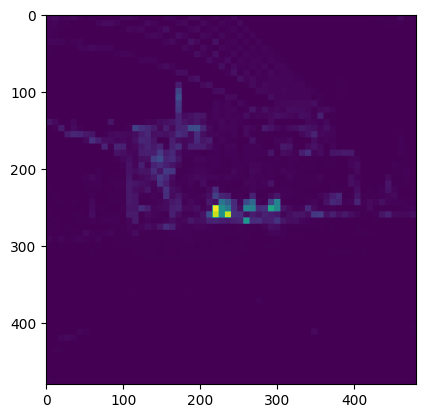

In [30]:
import os
import torch.nn as nn
import torchvision

threshold = 0.6
w_featmap = pixel_values.shape[-2] // model.config.patch_size
h_featmap = pixel_values.shape[-1] // model.config.patch_size

# we keep only a certain percentage of the mass
val, idx = torch.sort (attentions)
val /= torch.sum (val, dim=1, keepdim = True)
cumval = torch.cumsum (val, dim=1)
th_attn = cumval > (1 - threshold)
idx2 = torch.argsort (idx)

for head in range (nh):
    th_attn[head] = th_attn[head][idx2[head]]

th_attn = th_attn.reshape(nh, w_featmap, h_featmap).float()

# interpolate
th_attn = nn.functional.interpolate(th_attn.unsqueeze(0), scale_factor=model.config.patch_size, mode="nearest")[0].cpu().numpy()

attentions = attentions.reshape(nh, w_featmap, h_featmap)
attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=model.config.patch_size, mode="nearest")[0].cpu()
attentions = attentions.detach().numpy()

# show and save attentions heatmaps
output_dir = '/kaggle/working/'
os.makedirs(output_dir, exist_ok=True)
torchvision.utils.save_image(torchvision.utils.make_grid(pixel_values, normalize=True, scale_each=True), os.path.join(output_dir, "img.png"))
for j in range(nh):
    fname = os.path.join(output_dir, "attn-head" + str(j) + ".png")
    plt.figure()
    plt.imshow(attentions[j])
    plt.imsave(fname=fname, arr=attentions[j], format='png')
    #print(f"{fname} saved.")

**GIT (GenerativeImage2Text)**

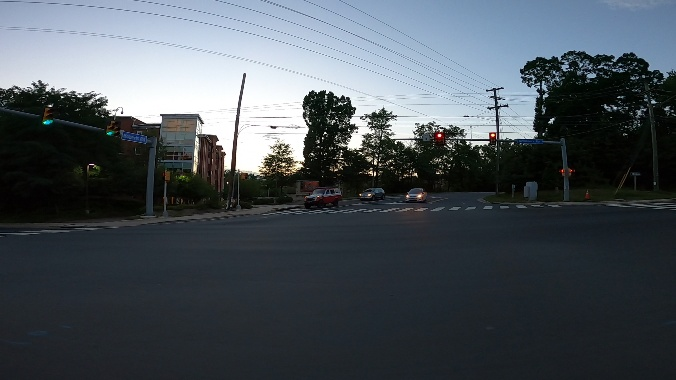

In [31]:
image_3 = Image.open ("/kaggle/input/car-object-detection/data/testing_images/vid_5_27400.jpg").convert("RGB")
image_3

In [32]:
# prepare image for model
from transformers import AutoProcessor

# the Auto API automatically loads a GitProcessor for us
processor = AutoProcessor.from_pretrained ("microsoft/git-base-textcaps")

pixel_values = processor (images = image_3, return_tensors="pt").pixel_values
pixel_values.shape

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

torch.Size([1, 3, 224, 224])

In [33]:
# generating caption
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-textcaps")

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [34]:
# run model on the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
pixel_values = pixel_values.to(device)

generated_ids = model.generate(pixel_values = pixel_values, max_length=20)
print("Generated caption:", processor.batch_decode (generated_ids, skip_special_tokens=True))

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

Generated caption: ['a street with a red light that says " stop ".']


In [35]:
# visual question answering
# download aanother model trained on the COCO dataset
from transformers import AutoProcessor, AutoModelForCausalLM

processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")

model.to(device)
inputs = processor (images = image_3, return_tensors="pt")
pixel_values = inputs.pixel_values.to(device)

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)

print ("Generated caption:", processor.batch_decode (generated_ids, skip_special_tokens=True))

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

Generated caption: ['a street with a red light and some cars']
